In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", context='notebook', color_codes=True)

The goal of this notebook is to explore our raw datasets and check if the dataset needs cleaning.
After removing duplicates and handling missing values, we store the results in another CSV file.

# Events Dataset

In [2]:
file_path = "data/events_1_1.csv"
dataset = pd.read_csv(file_path)

In [3]:
dataset.head()

,ts,event_type,user_id,date_from,date_to,origin,destination,num_adults,num_children
0,2017-04-27 11:06:51,search,60225f,2017-06-01,2017-06-07,PAR,NYC,6,1
1,2017-04-27 20:15:27,book,e5d69e,2017-08-12,2017-09-02,FRA,WAS,3,1
2,2017-04-27 23:03:43,book,f953f0,2017-10-08,2017-10-11,BER,CGN,2,0
3,2017-04-27 15:17:50,book,794d35,2017-04-28,2017-05-01,BER,BCN,1,0
4,2017-04-27 22:51:57,book,ca4f94,2017-05-16,2017-05-22,DEL,BKK,4,0


### Removing Duplicates

First, we need to check if there are duplicates in our event dataset

In [4]:
dataset.duplicated().values.any()

True

Since our dataset has duplicated rows, let's remove those duplicated rows in our dataset by keeping the first entry.

In [5]:
dataset = dataset.drop_duplicates(keep='first')

In [6]:
dataset.duplicated().values.any()

False

### Handling Missing Values

First, we need to find those columns with missing data.

In [7]:
dataset.columns[dataset.isnull().any()]

Index(['date_from', 'date_to'], dtype='object')

We found `date_from` and `date_to` columns contains missing values in events dataset. Let us look at dataset deeper if we can do something by assigning default value or removing the data.

In [8]:
missing_date_to = dataset[dataset['date_to'].isnull()]
missing_date_to

,ts,event_type,user_id,date_from,date_to,origin,destination,num_adults,num_children
13796,2017-04-23 19:02:48,search,299320,NaN,NaN,BRU,TLS,0,0
18675,2017-04-24 21:13:32,search,2ac874,NaN,NaN,AYT,DUS,0,0
26012,2017-04-28 18:12:17,search,d02975,NaN,NaN,DUB,AMS,0,0


We found that there are only 3 users who have missing `date_to`. Now, let's look at all the data from these 3 users.

In [9]:
user_ids = missing_date_to['user_id'].tolist()
dataset[dataset['user_id'].isin(user_ids)]

,ts,event_type,user_id,date_from,date_to,origin,destination,num_adults,num_children
13796,2017-04-23 19:02:48,search,299320,NaN,NaN,BRU,TLS,0,0
18675,2017-04-24 21:13:32,search,2ac874,NaN,NaN,AYT,DUS,0,0
26012,2017-04-28 18:12:17,search,d02975,NaN,NaN,DUB,AMS,0,0


We have found that each user has only 1 activity with search `event_type` and missing `date_from` and `date_to`. Since we are interested to users with multiple activities to help us classify if they are most likely to book in the platform, I consider these 3 users with 1 activity and missing `date_to` a noise data. Thus, I remove those data.

In [10]:
dataset = dataset[~dataset['user_id'].isin(user_ids)] #removes the data from users 299320, 2ac874, d02975

Now, let's look at our dataset with missing `date_from`.

In [11]:
missing_date_from = dataset[dataset['date_from'].isnull()]

In [12]:
user_ids = missing_date_from['user_id'].tolist()
user_events_with_missing_date_from = dataset[dataset['user_id'].isin(user_ids)].sort_values(by=['user_id', 'ts'])
user_events_with_missing_date_from

,ts,event_type,user_id,date_from,date_to,origin,destination,num_adults,num_children
19137,2017-04-29 21:31:57,search,139d74,NaN,2017-09-02,CGN,AYT,0,0
31060,2017-04-29 21:36:04,search,139d74,NaN,2017-09-02,CGN,AYT,0,0
31061,2017-04-29 21:37:20,search,139d74,NaN,2017-09-02,CGN,AYT,0,0
44642,2017-05-01 00:18:23,search,15568d,NaN,2017-06-20,AMS,IST,0,0
41752,2017-04-27 15:58:06,search,3e44c4,NaN,2017-06-23,AMS,MAD,0,0
23407,2017-04-27 17:52:49,search,450011,NaN,2018-04-02,BKK,DUS,0,0
20664,2017-04-27 19:35:16,search,450011,NaN,2017-07-10,DUS,BKK,0,0
5476,2017-04-28 23:24:26,search,46cad7,NaN,2017-05-24,AMS,MUC,0,0
8407,2017-04-28 23:25:25,search,46cad7,NaN,2017-05-24,AMS,MUC,0,0
7580,2017-04-28 23:41:06,search,46cad7,NaN,2017-05-24,AMS,MUC,0,0


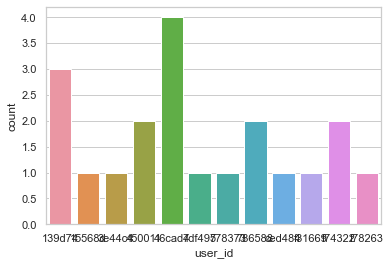

In [13]:
temp = user_events_with_missing_date_from.groupby(['user_id', 'event_type']).count()
sns.countplot(x='user_id', data=user_events_with_missing_date_from)

As we can see in our graph, there are 12 unique users who had missing `date_from` in their event data. 
There are 5 users with 2 or more events and 7 users have only 1 event.
User `46cad7` has 3 search and 1 book events but if we look at the data closely `num_children` and `num_adults` have 0 values. To my knowledge, a valid book event should have dates and corresponding number of people.

We have 19 rows with missing `date_from` and their corresponding `num_children` and `num_adults` are 0. I consider them a noise data and remove them in our dataset.

In [14]:
dataset = dataset.dropna(subset=['date_from'])
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

Save the new dataset to `data/events_no_duplicates.csv`

In [29]:
dataset.to_csv('data/events_no_duplicates.csv', index=False)

# IATA Code Dataset

In [15]:
file_path = "data/iata_1_1.csv"
iata = pd.read_csv(file_path)

## Removing Duplicates

First, we need to check if there are duplicates in our dataset

In [16]:
iata.duplicated().values.any()

True

Since our dataset has duplicated rows, let's remove those duplicated rows in our dataset by keeping the first entry.

In [17]:
iata = iata.drop_duplicates(keep='first')

In [18]:
iata.duplicated().values.any()

False

In [19]:
iata.duplicated().values.any()

False

In [20]:
### Check for missing values
iata.columns[iata.isnull().any()]

Index([], dtype='object')

Our iata dataset has no missing values.

In [21]:
iata.sort_values(by='iata_code').head()

,iata_code,lat,lon
338,ABV,9.01,7.26
337,ABV,9.06,7.50
395,ADB,38.29,27.16
172,ADD,8.98,38.80
171,ADD,9.02,38.75


I discovered that `iata_code` in our IATA dataset is not unique and different values of `lat` and `lon`.
This can be confusing when calculating the geo distance between two airports. To avoid confusion, let's consider only the first record of the iata_code with multiple `lat` and `lon` values.

In [22]:
iata = iata.drop_duplicates(subset=['iata_code'], keep='first')

In [23]:
iata.sort_values(by='iata_code').head()

,iata_code,lat,lon
337,ABV,9.06,7.50
395,ADB,38.29,27.16
171,ADD,9.02,38.75
254,ADL,-34.94,138.53
133,AEP,-34.56,-58.42


In [24]:
iata.to_csv('data/iata_no_duplicates.csv', index=False)